<a href="https://colab.research.google.com/github/jyjoon001/EEE4178/blob/main/20161482_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_excel('/content/drive/My Drive/train.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  int64  
 4   total_rooms         16512 non-null  int64  
 5   total_bedrooms      16354 non-null  float64
 6   population          16512 non-null  int64  
 7   households          16512 non-null  int64  
 8   median_income       16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
 10  target              16512 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 1.4+ MB


In [ ]:
data.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,10332.352108,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724
std,5979.473431,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5157.750000,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000
50%,10341.000000,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000
75%,15522.500000,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000
max,20638.000000,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


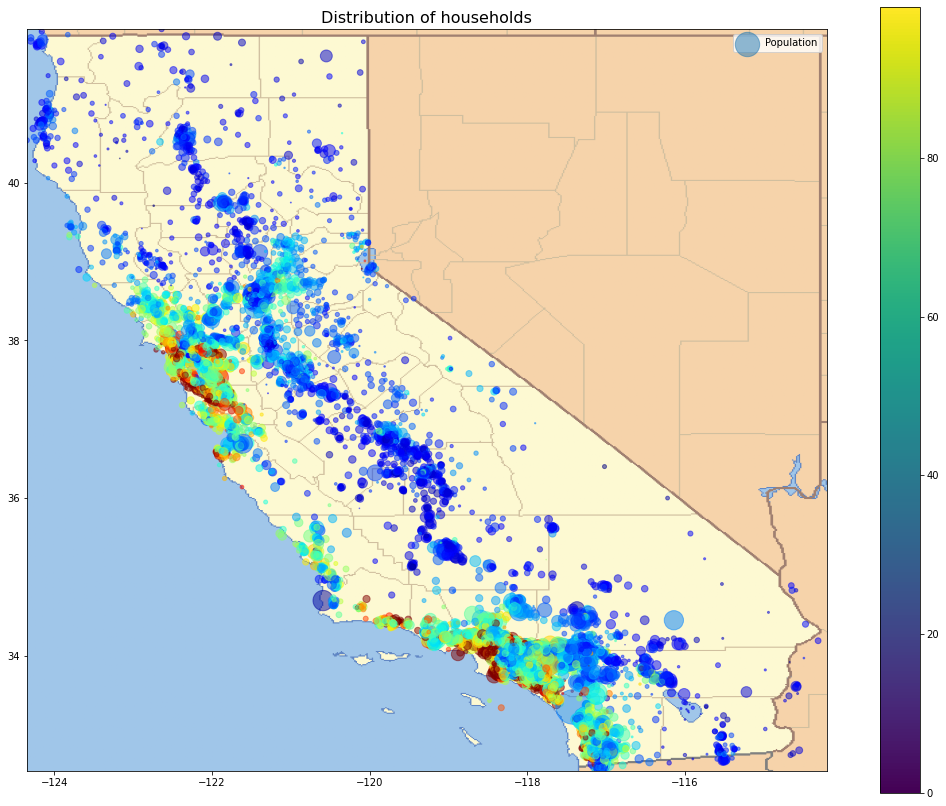

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(plt.imread('/content/drive/My Drive/california.png'),zorder=0,extent=[-124.35,-114.2,32.54,41.95])
plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.5,s=data['population']/30,c=data['target'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar(im,fraction=0.044, pad=0.06)
plt.title("Distribution of households",size=16)
plt.legend()

target                1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
Unnamed: 0            0.067723
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: target, dtype: float64

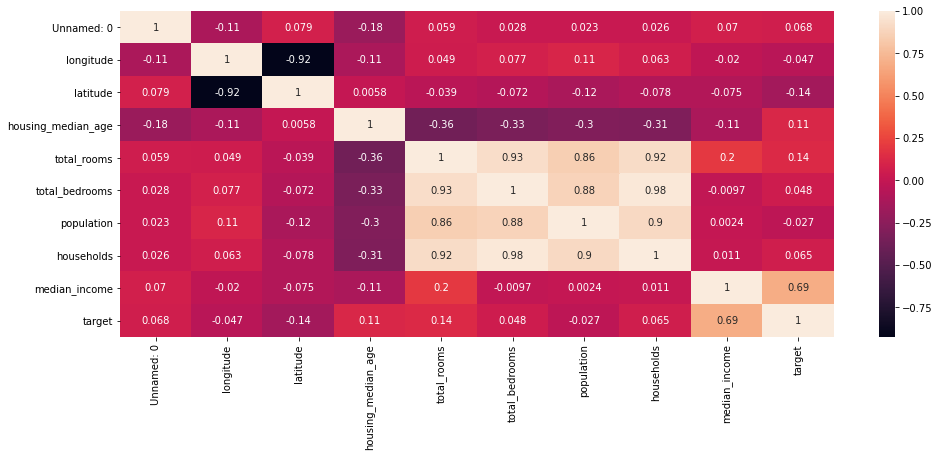

In [ ]:
corr_matrix=data.corr()
plt.figure(figsize = (16,6))
sns.heatmap(corr_matrix, annot=True)
corr_matrix['target'].sort_values(ascending=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6868ec6cf8>,
      dtype=object)

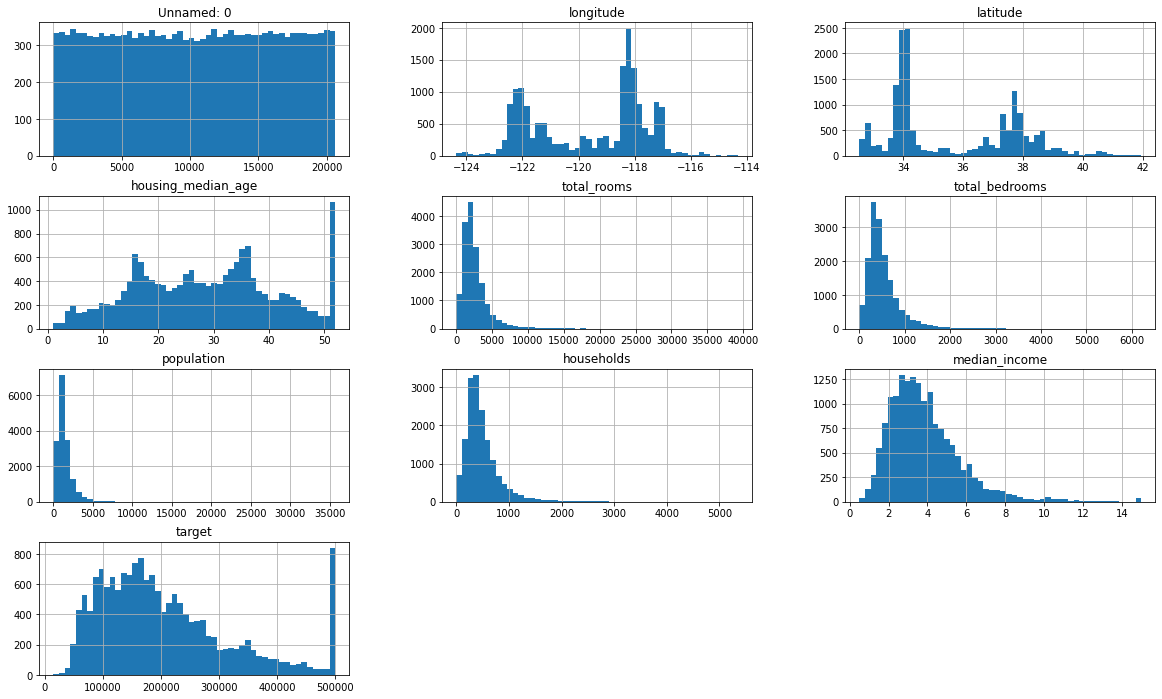

In [ ]:
data.hist(bins=50,figsize=(20,12))

In [ ]:
data['ocean_proximity'].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data['ocean_proximity'] = data['ocean_proximity'].replace(['ISLAND'],'NEAR BAY')

In [ ]:
train_set, val_set = train_test_split(data, test_size = 0.2)
train_set.to_csv("train_set.csv",index=False)
val_set.to_csv("val_set.csv",index=False)
data=pd.read_csv('train_set.csv')

<Figure size 720x432 with 0 Axes>

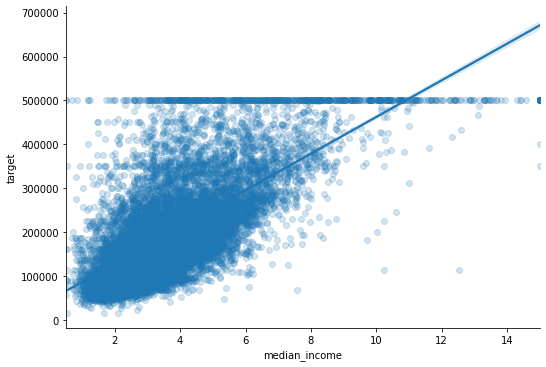

In [ ]:
plt.figure(figsize=(10,6))
sns.lmplot(x='median_income', y='target', data=data, aspect=1.5, scatter_kws={'alpha':0.2})

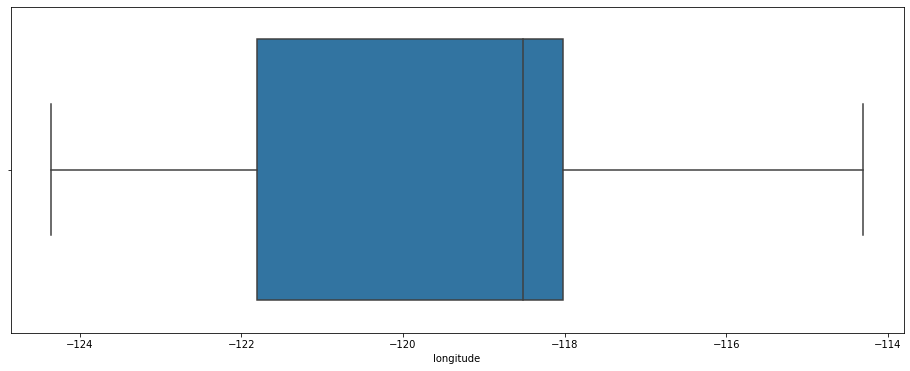

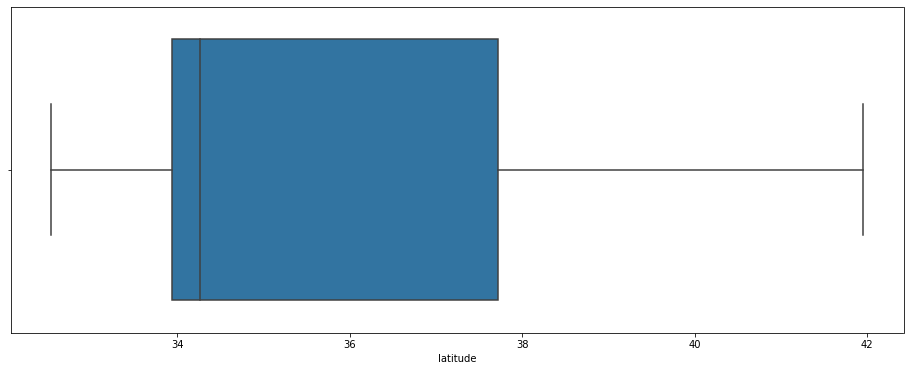

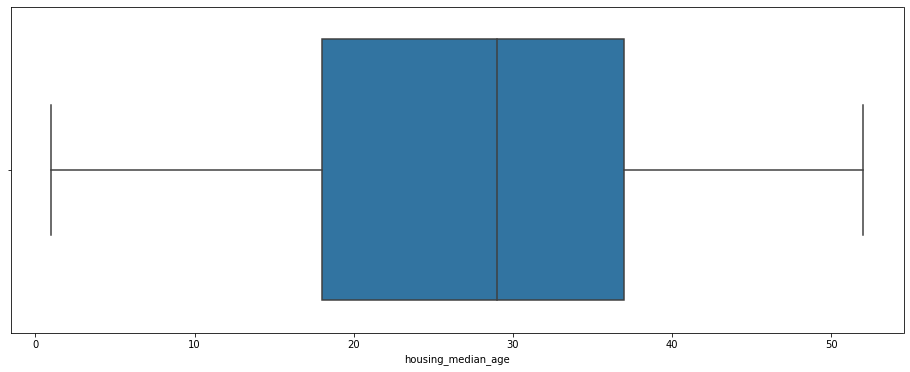

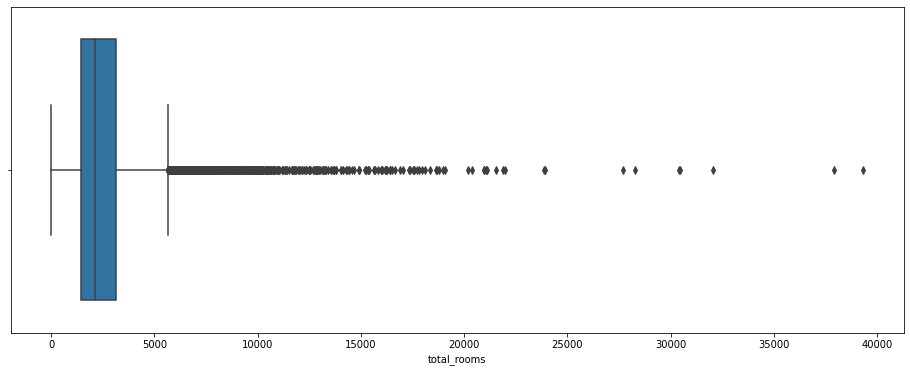

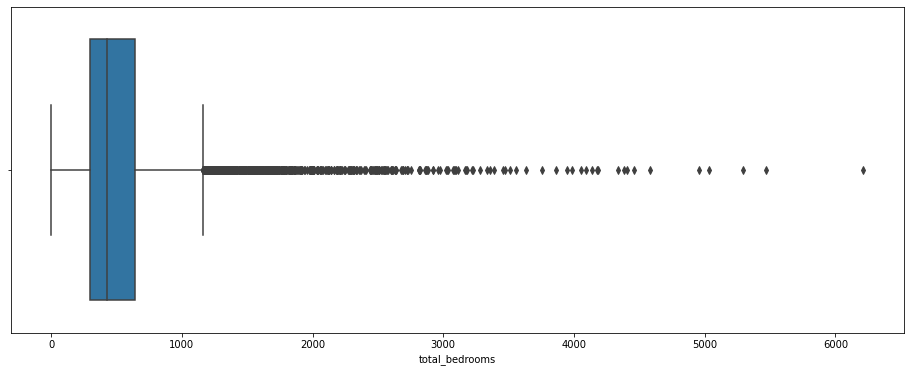

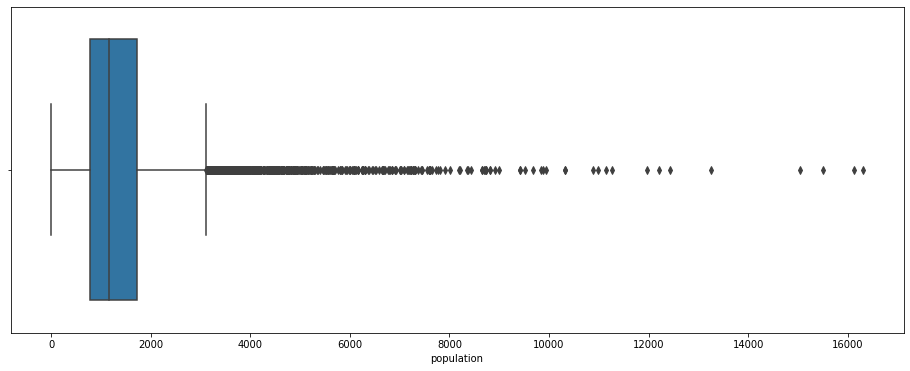

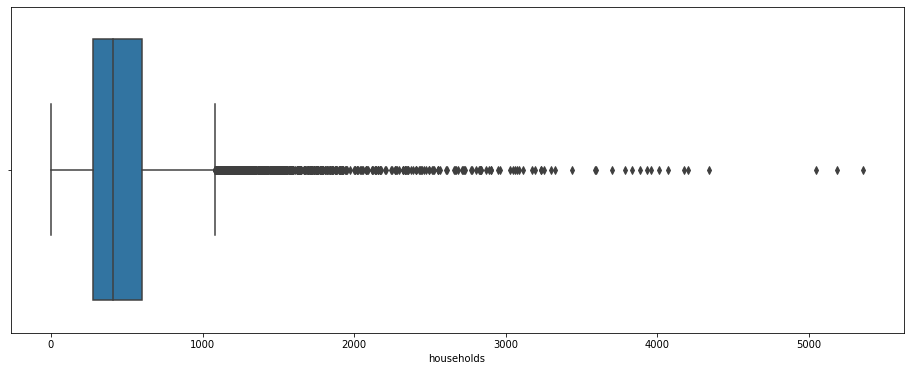

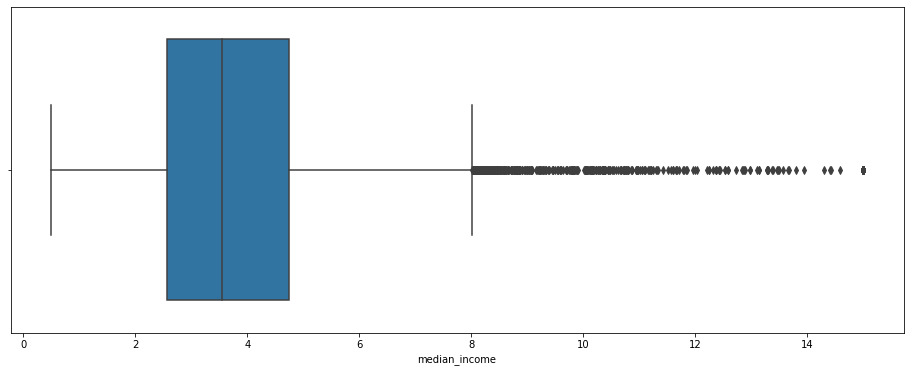

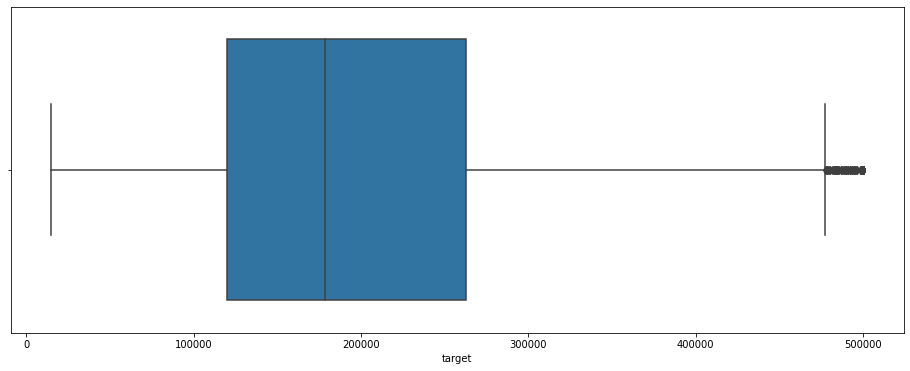

In [ ]:
num_features=data.columns.drop("ocean_proximity")
for i in num_features:
    plt.figure(figsize = (16,6))
    sns.boxplot(x=i,data=data)

In [ ]:
skewness_before=[]
for i in num_features:
    skewness_before.append(data[i].skew())
pd.DataFrame(data=skewness_before,index=num_features,columns=['skewness']).sort_values(by='skewness',ascending=False)

,skewness
total_rooms,4.189168
population,3.423289
total_bedrooms,3.354720
households,3.279056
median_income,1.673166
target,0.994929
latitude,0.457370
housing_median_age,0.056686
longitude,-0.293770


longitude                  3.7800
latitude                   3.7800
housing_median_age        19.0000
total_rooms             1689.0000
total_bedrooms           347.0000
population               933.0000
households               321.0000
median_income              2.1812
target                143000.0000
dtype: float64


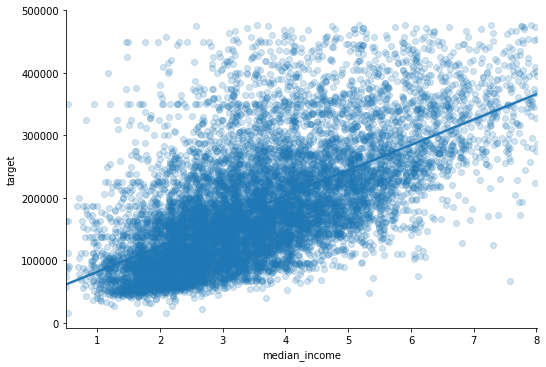

In [ ]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)
data_outliner = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_outliner.head()
sns.lmplot(x='median_income', y='target', data=data_outliner, aspect=1.5, scatter_kws={'alpha':0.2})

In [ ]:
skewness=[]
for i in num_features:
    skewness.append(data_outliner[i].skew())
pd.DataFrame(data=skewness,index=num_features,columns=['skewness']).sort_values(by='skewness',ascending=False)

,skewness
target,0.781748
total_rooms,0.673366
total_bedrooms,0.648306
population,0.615813
households,0.605632
median_income,0.570907
latitude,0.415708
housing_median_age,0.016811
longitude,-0.262254


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68690facc0>,
      dtype=object)

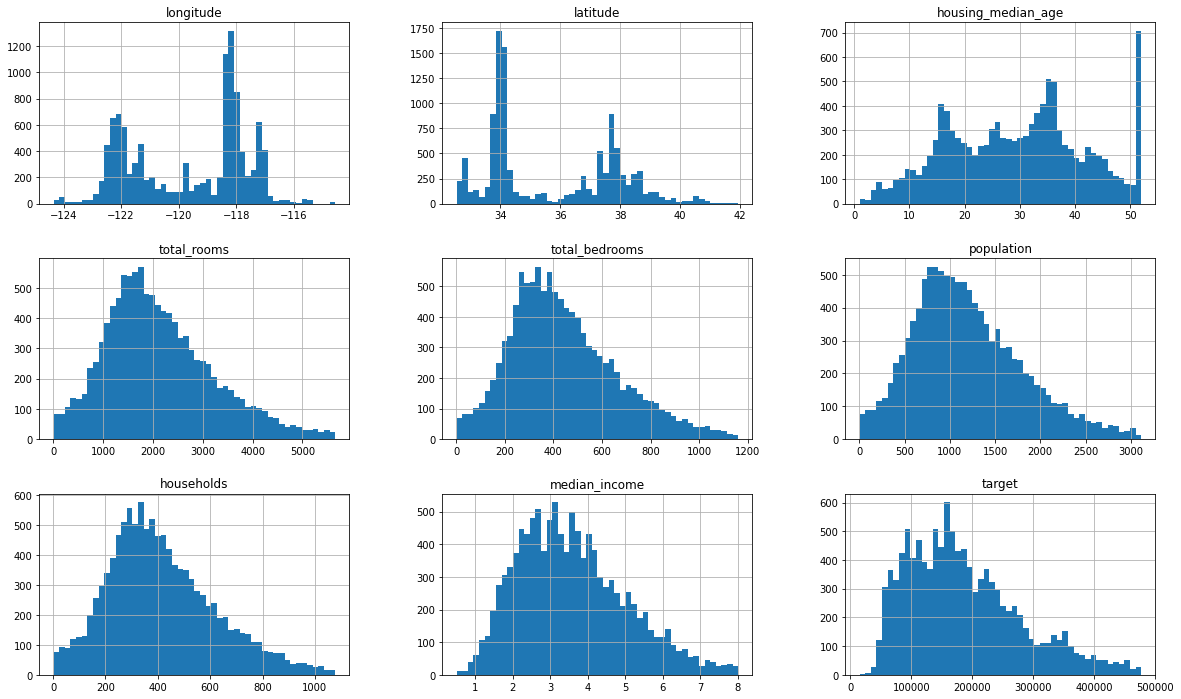

In [ ]:
data_outliner.hist(bins=50,figsize=(20,12))

In [ ]:
SKsimpleimpute = SimpleImputer(strategy="median")
SKscaler=StandardScaler()
SKonehotencode = OneHotEncoder(sparse=False)

In [ ]:
data_outliner.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        106
population              0
households              0
median_income           0
ocean_proximity         0
target                  0
dtype: int64

In [ ]:
data_num = data_outliner.drop("ocean_proximity", axis=1)
data_cat = data_outliner["ocean_proximity"]
data_num = pd.DataFrame(SKsimpleimpute.fit_transform(data_num), columns=data_num.columns)
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11262 entries, 0 to 11261
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           11262 non-null  float64
 1   latitude            11262 non-null  float64
 2   housing_median_age  11262 non-null  float64
 3   total_rooms         11262 non-null  float64
 4   total_bedrooms      11262 non-null  float64
 5   population          11262 non-null  float64
 6   households          11262 non-null  float64
 7   median_income       11262 non-null  float64
 8   target              11262 non-null  float64
dtypes: float64(9)
memory usage: 792.0 KB


target                      1.000000
median_income               0.628313
total_rooms                 0.191860
households                  0.122730
rooms_per_household         0.104193
housing_median_age          0.101208
total_bedrooms              0.093971
population                 -0.008104
longitude                  -0.041467
latitude                   -0.159636
bedrooms_per_room          -0.188347
population_per_household   -0.230534
Name: target, dtype: float64

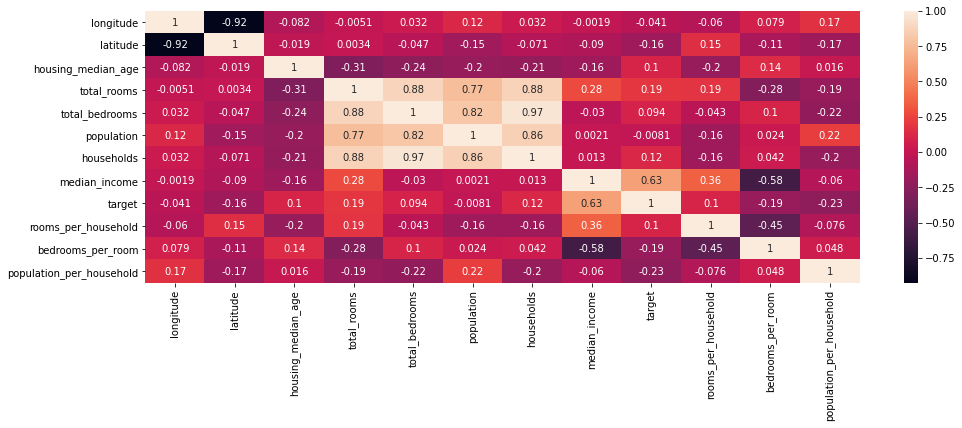

In [ ]:
data_num['rooms_per_household']=data_num['total_rooms']/data_num['households']
data_num['bedrooms_per_room']=data_num['total_bedrooms']/data_num['total_rooms']
data_num['population_per_household']=data_num['population']/data_num['households']
corr_matrix=data_num.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr_matrix, annot=True)
corr_matrix['target'].sort_values(ascending=False)

In [ ]:
data_labels=data_num['target']
data_num=data_num.drop('target',axis=1)

In [ ]:
data_scaled=SKscaler.fit_transform(data_num)
data_cat = SKonehotencode.fit_transform(data_cat.values.reshape(-1,1))
SKonehotencode.categories_

[array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

In [ ]:
data=np.concatenate([data_scaled, data_cat],axis=1)

In [ ]:
num_features=data_num.columns.tolist()
num_features.extend(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'])
df=pd.DataFrame(data,columns=num_features)
data_prepared=df
data_prepared.info()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,validation_curve,train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
def plot_validation_curve(scores,param_range,param_name,scoring):
    n=len(param_range)
    test_score=[np.sqrt(-scores[1][i].mean()) for i in range (0,n)]

    fig=plt.figure(figsize=(6,6))
    plt.plot(param_range,test_score,label='Validation')
    plt.xticks=param_range
    plt.title("Validation curve of {}".format(param_name),size=16)
    plt.legend()

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
lr=LinearRegression()
lr.fit(data_prepared,data_labels)
train_pred=lr.predict(data_prepared)
mse=mean_squared_error(data_labels,train_pred)
rmse=np.sqrt(mse)
print('RMSE(Train Error):',rmse)
scores=cross_val_score(lr,data_prepared,data_labels,cv=5,scoring='neg_mean_squared_error')
print('RMSE:',np.sqrt(-scores).mean())

RMSE(Train Error): 56503.97826146843
RMSE: 56607.94741870197


In [ ]:
ridge=Ridge()
ridge.fit(data_prepared,data_labels)
train_pred=ridge.predict(data_prepared)
mse=mean_squared_error(data_labels,train_pred)
rmse=np.sqrt(mse)
print('RMSE(Train Error):',rmse)
scores=cross_val_score(ridge,data_prepared,data_labels,cv=5,scoring='neg_mean_squared_error')
print('RMSE:',np.sqrt(-scores).mean())

RMSE(Train Error): 56503.993788437
RMSE: 56607.80815533913


In [ ]:
tree=DecisionTreeRegressor()
tree.fit(data_prepared,data_labels)
train_pred=tree.predict(data_prepared)
mse=mean_squared_error(data_labels,train_pred)
rmse=np.sqrt(mse)
print('RMSE(Train Error):',rmse)
scores=cross_val_score(tree,data_prepared,data_labels,cv=5,scoring='neg_mean_squared_error')
print('RMSE:',np.sqrt(-scores).mean())

RMSE(Train Error): 0.0
RMSE: 63049.15096198979


In [ ]:
forest=RandomForestRegressor()
forest.fit(data_prepared,data_labels)
train_pred=forest.predict(data_prepared)
mse=mean_squared_error(data_labels,train_pred)
rmse=np.sqrt(mse)
print('RMSE(Train Error):',rmse)
scores=cross_val_score(forest,data_prepared,data_labels,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
print('RMSE:',np.sqrt(-scores).mean())

RMSE(Train Error): 16444.644226120556
RMSE: 44729.73176487289


In [ ]:
svr=SVR()
svr.fit(data_prepared,data_labels)
train_pred=svr.predict(data_prepared)
mse=mean_squared_error(data_labels,train_pred)
rmse=np.sqrt(mse)
print('RMSE(Train Error):',rmse)
scores=cross_val_score(svr,data_prepared,data_labels,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
print('RMSE:',np.sqrt(-scores).mean())

RMSE(Train Error): 94392.43706585978
RMSE: 94456.5898099344


In [ ]:
gbr=GradientBoostingRegressor()
gbr.fit(data_prepared,data_labels)
train_pred=gbr.predict(data_prepared)
mse=mean_squared_error(data_labels,train_pred)
rmse=np.sqrt(mse)
print('RMSE(Train Error):',rmse)
scores=cross_val_score(gbr,data_prepared,data_labels,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
print('RMSE:',np.sqrt(-scores).mean())

RMSE(Train Error): 44197.23661814588
RMSE: 47177.73637412109


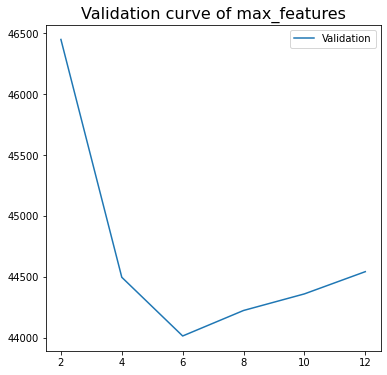

In [ ]:
param_name='max_features'
param_range = range(2,14,2)
scoring='neg_mean_squared_error'
curve=validation_curve(forest,data_prepared,data_labels,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)
plot_validation_curve(curve,param_range,param_name,scoring)

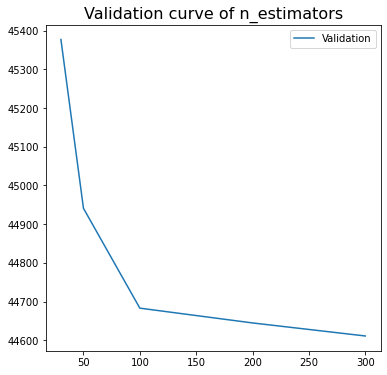

In [ ]:
param_name='n_estimators'
param_range = [30, 50, 100, 200, 300]
scoring='neg_mean_squared_error'
curve=validation_curve(forest,data_prepared,data_labels,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)
plot_validation_curve(curve,param_range,param_name,scoring)

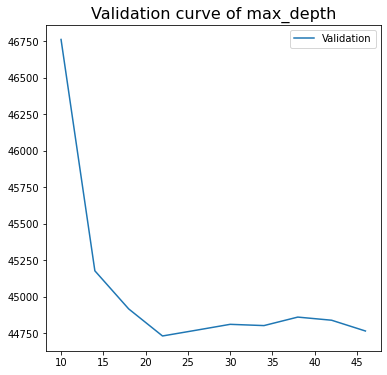

In [ ]:
param_name='max_depth'
param_range = range(10,50,4)
scoring='neg_mean_squared_error'
curve=validation_curve(forest,data_prepared,data_labels,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)
plot_validation_curve(curve,param_range,param_name,scoring)

In [ ]:
param_grid = [
    {'n_estimators': [300], 
     'max_features': [5, 6, 7],
     'max_depth': [21, 22, 23]},
  ]
grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,n_jobs=-1)
grid_search.fit(data_prepared, data_labels)
grid_search.best_params_

{'max_depth': 23, 'max_features': 6, 'n_estimators': 300}

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

43941.97036536455 {'max_depth': 21, 'max_features': 5, 'n_estimators': 300}
43944.6101066475 {'max_depth': 21, 'max_features': 6, 'n_estimators': 300}
43965.215097853536 {'max_depth': 21, 'max_features': 7, 'n_estimators': 300}
43950.48025343575 {'max_depth': 22, 'max_features': 5, 'n_estimators': 300}
43895.450393987776 {'max_depth': 22, 'max_features': 6, 'n_estimators': 300}
43906.349291575 {'max_depth': 22, 'max_features': 7, 'n_estimators': 300}
44059.29087493717 {'max_depth': 23, 'max_features': 5, 'n_estimators': 300}
43844.209818832074 {'max_depth': 23, 'max_features': 6, 'n_estimators': 300}
43972.77249189659 {'max_depth': 23, 'max_features': 7, 'n_estimators': 300}


In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
test_data=pd.read_csv('val_set.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303 entries, 0 to 3302
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3303 non-null   float64
 1   latitude            3303 non-null   float64
 2   housing_median_age  3303 non-null   int64  
 3   total_rooms         3303 non-null   int64  
 4   total_bedrooms      3268 non-null   float64
 5   population          3303 non-null   int64  
 6   households          3303 non-null   int64  
 7   median_income       3303 non-null   float64
 8   ocean_proximity     3303 non-null   object 
 9   target              3303 non-null   int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 258.2+ KB


In [ ]:
Q1=test_data.quantile(0.25)
Q3=test_data.quantile(0.75)
IQR=Q3-Q1
data_outliner = test_data[~((test_data < (Q1 - 1.5 * IQR)) |(test_data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_num = data_outliner.drop("ocean_proximity", axis=1)
data_cat = data_outliner["ocean_proximity"]
data_num = pd.DataFrame(SKsimpleimpute.fit_transform(data_num), columns=data_num.columns)
data_num['rooms_per_household']=data_num['total_rooms']/data_num['households']
data_num['bedrooms_per_room']=data_num['total_bedrooms']/data_num['total_rooms']
data_num['population_per_household']=data_num['population']/data_num['households']
test_data_labels=data_num['target']
data_num=data_num.drop('target',axis=1)
data_scaled=SKscaler.fit_transform(data_num)
data_cat = SKonehotencode.fit_transform(data_cat.values.reshape(-1,1))
SKonehotencode.categories_
test_data=np.concatenate([data_scaled, data_cat],axis=1)
df=pd.DataFrame(test_data,columns=num_features)
test_prepared=df
test_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 2806 non-null   float64
 1   latitude                  2806 non-null   float64
 2   housing_median_age        2806 non-null   float64
 3   total_rooms               2806 non-null   float64
 4   total_bedrooms            2806 non-null   float64
 5   population                2806 non-null   float64
 6   households                2806 non-null   float64
 7   median_income             2806 non-null   float64
 8   rooms_per_household       2806 non-null   float64
 9   bedrooms_per_room         2806 non-null   float64
 10  population_per_household  2806 non-null   float64
 11  <1H OCEAN                 2806 non-null   float64
 12  INLAND                    2806 non-null   float64
 13  NEAR BAY                  2806 non-null   float64
 14  NEAR OCE

In [ ]:
final_model.fit(data_prepared,data_labels)
train_pred=final_model.predict(data_prepared)
test_pred=final_model.predict(test_prepared)

In [ ]:
mse=mean_squared_error(data_labels,train_pred)
rmse=np.sqrt(mse)
print('RMSE(Train Error):',rmse)
scores=cross_val_score(final_model,data_prepared,data_labels,n_jobs=-1,scoring='neg_mean_squared_error')
print('RMSE(Cross-Validation Error):',np.sqrt(-scores).mean())
mse=mean_squared_error(test_data_labels,test_pred)
rmse=np.sqrt(mse)
print('RMSE(Test Error):',rmse)

RMSE(Train Error): 16066.554255950394
RMSE(Cross-Validation Error): 43886.48836752757
RMSE(Test Error): 46236.37061414899


In [ ]:
data=pd.read_excel('/content/drive/My Drive/train.xlsx')
data.drop('Unnamed: 0',axis=1,inplace=True)
data['ocean_proximity'] = data['ocean_proximity'].replace(['ISLAND'],'NEAR BAY')
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
data_outliner = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_num = data_outliner.drop("ocean_proximity", axis=1)
data_cat = data_outliner["ocean_proximity"]
data_num = pd.DataFrame(SKsimpleimpute.fit_transform(data_num), columns=data_num.columns)
data_num['rooms_per_household']=data_num['total_rooms']/data_num['households']
data_num['bedrooms_per_room']=data_num['total_bedrooms']/data_num['total_rooms']
data_num['population_per_household']=data_num['population']/data_num['households']
data_labels=data_num['target']
data_num=data_num.drop('target',axis=1)
data_scaled=SKscaler.fit_transform(data_num)
data_cat = SKonehotencode.fit_transform(data_cat.values.reshape(-1,1))
SKonehotencode.categories_
test_data=np.concatenate([data_scaled, data_cat],axis=1)
num_features=data_num.columns.tolist()
num_features.extend(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'])
df=pd.DataFrame(test_data,columns=num_features)
df.to_csv("train_set.csv",index=False)
data_labels.to_csv("train_labels.csv",index=False)
data_prepared=df
data_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14067 entries, 0 to 14066
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 14067 non-null  float64
 1   latitude                  14067 non-null  float64
 2   housing_median_age        14067 non-null  float64
 3   total_rooms               14067 non-null  float64
 4   total_bedrooms            14067 non-null  float64
 5   population                14067 non-null  float64
 6   households                14067 non-null  float64
 7   median_income             14067 non-null  float64
 8   rooms_per_household       14067 non-null  float64
 9   bedrooms_per_room         14067 non-null  float64
 10  population_per_household  14067 non-null  float64
 11  <1H OCEAN                 14067 non-null  float64
 12  INLAND                    14067 non-null  float64
 13  NEAR BAY                  14067 non-null  float64
 14  NEAR O

In [ ]:
filename = 'model.sav'
joblib.dump(forest, filename)